# Testy dwóch populacji
### Testy dwóch populacji
Testy dwóch populacji dzielimy na dwie grupy:
* **testy niesparowane** - próbki pochodzą z dwóch różnych populacji, które mogą być ze sobą powiązane, ale nie są to **pary** próbek
* **testy sparowane** - próbki pochodzą z tej samej populacji, ale w różnych okresach czasu lub w różnych warunkach
### Testy niesparowane dla dużych prób
Warunki testu: <br>
* $n_1,n_2 > 30$ <br>
* rozkład normalny <br>

Wzór na statystykę testową: <br>
$$Z = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} \sim  N(0,1) $$
Jeżeli $\sigma$ nie jest znana, estymujemy je z danych $s_1$

[1] 0.248579

[1] 2.326348

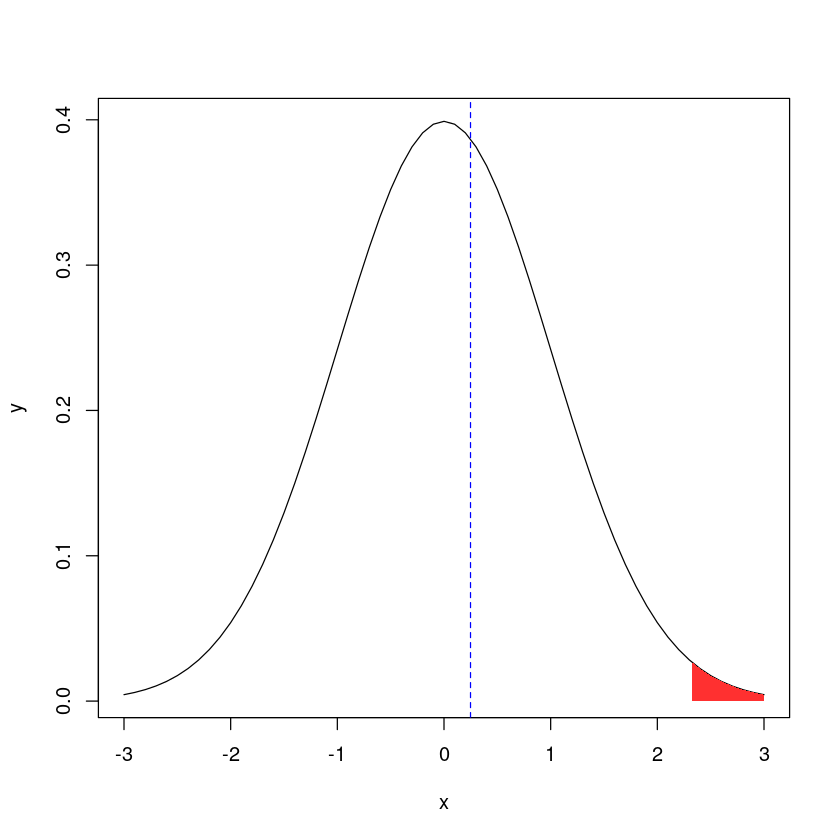

In [7]:
plot_norm  <- function(z, z_crit) {
    x_max  <- max(3, abs(z))
    x  <- seq(-x_max, x_max, 0.1)
    y  <- dnorm(x)
    plot(x, y, type="l")
    abline(v = z, col="blue", lty=2)
    for (zc in z_crit) {
        if (zc > 0) {
            x_c  <- c(zc, zc, x[x > zc], max(x))
            y_c  <- c(0, dnorm(zc), y[x > zc], 0) 
        } else {
            x_c  <- c(min(x), x[x < zc], zc, zc)
            y_c  <- c(0, y[x < zc], dnorm(zc), 0)             
        }
        polygon(x_c, y_c, border=NA, col="firebrick1")
    }
}

n_1 <- 32
n_2 <- 54
mu_1 <- 23.2
mu_2 <- 23.4
var_1 <- 13.9
var_2 <- 11.5
s_1 <- sqrt(var_1)
s_2 <- sqrt(var_2)
alpha <- 0.02
z <- (abs(mu_1-mu_2)) / sqrt((s_1^2/n_1)+(s_2^2/n_2))
z
z_crit <- qnorm(1 - alpha/2)
z_crit
plot_norm(z, z_crit)


### Testy niesparowane dla małych prób
Warunki testu: <br>
* **Równa wariancje!** <br>
* $n_1,n_2 < 30$ <br>
* rozkład normalny <br>
#### Estymator wariancji łącznej:
Wzór estymatora wariancji łącznej: <br>
$$s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$

In [8]:
a <- c(5, 6, 12, 9, 8, 5, 7, 8, 15, 7)
b <- c(6, 5, 11, 5, 3, 4, 6, 6, 4, 9, 3, 2)
sd_a <- sd(a)
sd_b <- sd(b)
n_1 <- length(a)
n_2 <- length(b)
alpha <- 0.05
s = ((n_1-1)*sd_a^2 + (n_2-1)*sd_b^2 )/ (n_1+n_2-2) 
s

[1] 8.113333

#### Wzór na statystykę testową:
$$t = \frac{\bar{X_1} - \bar{X_2}}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim t(n_1 + n_2 - 2)$$

[1] 2.350481

[1] 2.085963

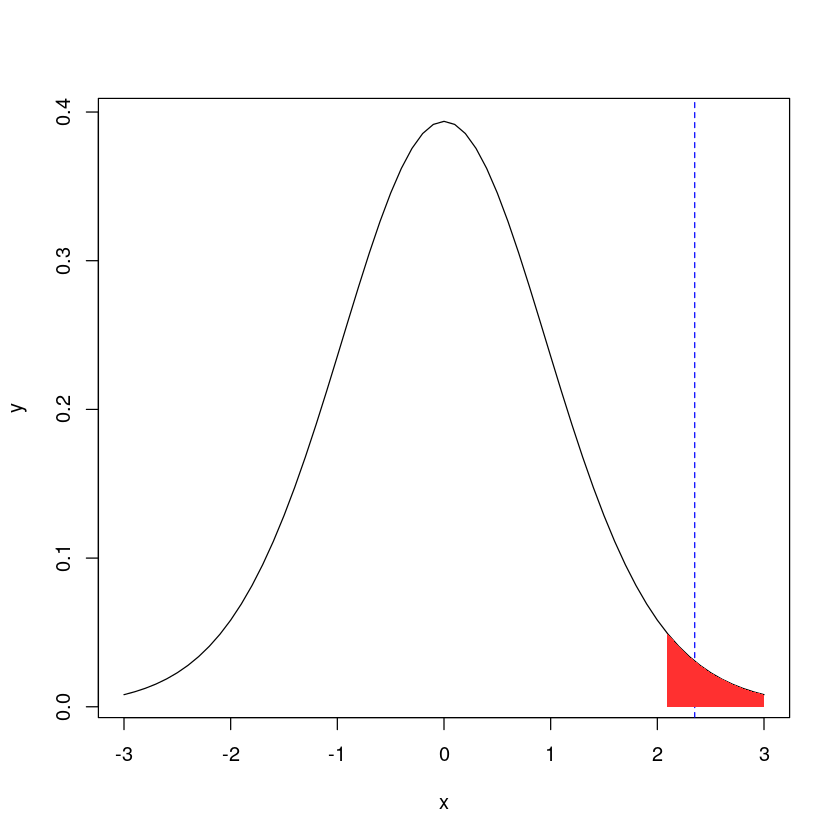

In [10]:
plot_norm_t  <- function(t, t_crit, n) {
    x_max  <- max(3, abs(t))
    x  <- seq(-x_max, x_max, 0.1)
    y  <- dt(x, n-1)
    plot(x, y, type="l")
    abline(v = t, col="blue", lty=2)
    for (tc in t_crit) {
        if (tc > 0) {
            x_c  <- c(tc, tc, x[x > tc], max(x))
            y_c  <- c(0, dt(tc, n-1), y[x > tc], 0) 
        } else {
            x_c  <- c(min(x), x[x < tc], tc, tc)
            y_c  <- c(0, y[x < tc], dt(tc, n-1), 0)             
        }
        polygon(x_c, y_c, border=NA, col="firebrick1")
    }
}

t <- (abs(mean(a)-mean(b))) / sqrt(s*((1/n_1)+(1/n_2)))
t
t_crit <- qt(1 - alpha/2, df=n_1+n_2-2)
t_crit
plot_norm_t(t, t_crit, n_1+n_2-2)

### Testy sparowane
Warunki testu: <br>
* Dwie próby o tym samym rozmiarze $n$ <br>
* Obserwacje parami zależne, tzn $(X_{1,i}, X_{2,i})$ zależne dla każdego $i$  

Testujemy różnice $\Delta_i = X_{1,i} - X_{2,i}$ <br>
#### Wzór na statystykę testową:
$$t = \frac{\bar{X}_{\Delta}}{s_{\Delta}}\sqrt{n} \sim \left\{ \begin{array}{lr} n < 30 \to t(n-1) \\ n > 30 \to N(0,1) \end{array}\right.$$

In [12]:

a <- c(334, 150, 520, 95, 212, 30, 1055, 300, 85, 129, 40, 440, 610, 208, 880, 25)
b <- c(405, 125, 540, 100, 200, 30, 1200, 265, 90, 206, 18, 489, 590, 310, 995, 75)
alpha <- 0.05
diff <- a - b
sd_diff <- sd(diff)
t <- (mean(diff)/sd_diff) * sqrt(length(diff))
t
t_crit <- qt(alpha/2, df=length(diff)-1)
t_crit
plot_norm_t(t, t_crit, length(diff)-1)

[1] 1.584106

[1] -2.364624

ERROR: Error in plot_norm_t(t, t_crit, length(diff) - 1): nie udało się znaleźć funkcji 'plot_norm_t'


### Test F
Test f służy do sprawdzenia, czy wariancje dwóch populacji są równe. <br>
Wzór na statystykę testową: <br>
$$F = \frac{s_1^2}{s_2^2} \sim F(n_1 - 1, n_2 - 1)$$

In [10]:
a <- c(5, 6, 12, 9, 8, 5, 7, 8, 15, 7)
b <- c(6, 5, 11, 5, 3, 4, 6, 6, 4, 9, 3, 2)
sd_a <- sd(a)
sd_b <- sd(b)
n_1 <- length(a)
n_2 <- length(b)
alpha <- 0.05
f = sd_a^2 / sd_b^2
f_critic = qf(alpha/2, df1=n_1-1, df2=n_2-1)
print(paste("F value:", f, "F critic:", f_critic))

[1] "F value: 1.50703363914373 F critic: 0.255618856023072"
